In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from SpectralLayer import *

2.3.1


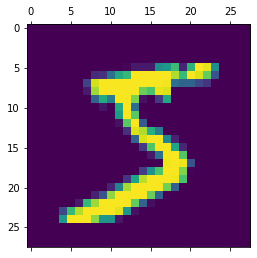

In [7]:
#data download and preprocess
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0
plt.matshow(x_train[0])
plt.show()

flat_train = np.reshape(x_train,[x_train.shape[0],28*28])
flat_test = np.reshape(x_test,[x_test.shape[0],28*28])


In [25]:
#This configurations trains only the eigenvalues
spectral_config={
    'is_base_trainable' : False,
    'is_diag_start_trainable' : True,
    'is_diag_end_trainable' : True,
    'use_bias' : False
}

#Build a model of 3 spectral layers according to the dimensions given previously
inputs = tf.keras.layers.Input(shape=(784,),dtype='float32') 
layer1 = Spectral(2000, **spectral_config, activation='tanh')(inputs)
layer2 = Spectral(200, **spectral_config, activation='tanh')(layer1)
output_lay = Spectral(10, **spectral_config, activation='softmax')(layer2)

model = tf.keras.models.Model(inputs=inputs, outputs=output_lay)

opt = tf.keras.optimizers.Adamax(learning_rate=0.02)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
spectral_18 (Spectral)       (None, 2000)              1570784   
_________________________________________________________________
spectral_19 (Spectral)       (None, 200)               402200    
_________________________________________________________________
spectral_20 (Spectral)       (None, 10)                2210      
Total params: 1,975,194
Trainable params: 5,194
Non-trainable params: 1,970,000
_________________________________________________________________


In [26]:
#Train for some epochs
epochs=30
history = model.fit(flat_train, y_train, batch_size=500, verbose=2, epochs=epochs)

Epoch 1/30
120/120 - 1s - loss: 1.0782 - accuracy: 0.7415
Epoch 2/30
120/120 - 1s - loss: 0.3811 - accuracy: 0.8895
Epoch 3/30
120/120 - 1s - loss: 0.3210 - accuracy: 0.9072
Epoch 4/30
120/120 - 1s - loss: 0.2866 - accuracy: 0.9171
Epoch 5/30
120/120 - 1s - loss: 0.2614 - accuracy: 0.9238
Epoch 6/30
120/120 - 1s - loss: 0.2412 - accuracy: 0.9302
Epoch 7/30
120/120 - 1s - loss: 0.2242 - accuracy: 0.9354
Epoch 8/30
120/120 - 1s - loss: 0.2103 - accuracy: 0.9393
Epoch 9/30
120/120 - 1s - loss: 0.1985 - accuracy: 0.9428
Epoch 10/30
120/120 - 1s - loss: 0.1877 - accuracy: 0.9455
Epoch 11/30
120/120 - 1s - loss: 0.1780 - accuracy: 0.9491
Epoch 12/30
120/120 - 1s - loss: 0.1706 - accuracy: 0.9507
Epoch 13/30
120/120 - 1s - loss: 0.1632 - accuracy: 0.9528
Epoch 14/30
120/120 - 1s - loss: 0.1567 - accuracy: 0.9545
Epoch 15/30
120/120 - 1s - loss: 0.1514 - accuracy: 0.9559
Epoch 16/30
120/120 - 1s - loss: 0.1461 - accuracy: 0.9575
Epoch 17/30
120/120 - 1s - loss: 0.1412 - accuracy: 0.9591
Epoch 

In [16]:
tested = model.evaluate(flat_test, y_test, batch_size = 100,verbose=1)
predicted = model.predict(flat_test)

100/100 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9323


Prediction:  6
Ground truth:  6


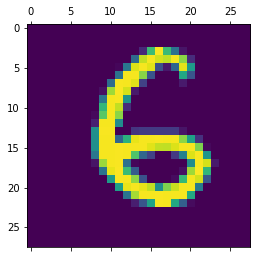

In [18]:
i = np.random.randint(10000)
print("Prediction: ", np.argmax(predicted[i]))
print("Ground truth: ", y_test[i])
plt.matshow(x_test[i])
plt.show()